<a href="https://colab.research.google.com/github/nathanielmacnell/nihworkshop/blob/main/Geospatial_for_Everyone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enhancing your "Non-Spatial" Research with Geospatial Data
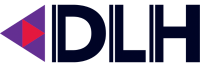

A free workshop for the [2025 NIH Research Festival](https://researchfestival.nih.gov/) presented by Drs. [Nat MacNell](https://orcid.org/0009-0007-9851-1376) and [Ian Buller](https://orcid.org/0000-0001-9477-8582) from [DLH Corporation](https://www.dlhcorp.com/).

Contact us with any questions:
- [nathaniel.macnell@dlhcorp.com](mailto:nathaniel.macnell@dlhcorp.com)
- [ian.buller@dlhcorp.com](mailto:ian.buller@dlhcorp.com)

If you're reading a PDF copy, the interactive version can be found here: [https://github.com/nathanielmacnell/nihworkshop/](https://github.com/nathanielmacnell/nihworkshop/)
- You'll need a free Google account to use the interactive version.

## 🚀 START HERE!

1.   **Click the ▶ play button** below to run the setup (it may show up as [ ] until you mouse over it).
2.  **Click the ☰ Table of contents** on the left to see sections.
3.  **Keep this browser window open** (changing tabs is okay).

- If you're accessing this workshop in the future and you do not get a **✔ check** after pressing the play button, try the **🔧Installing from CRAN** section under **📖Further Reading** near the end of this document.


In [1]:
### <- Click the play button here to set up your notebook

# download the libraries and unpack
download.file(
  'https://dlhcorp-my.sharepoint.com/:u:/p/nathaniel_macnell/EXnWcXbUQbNNhtKA-PixX5kB1PQHZdXY7e8E6nnX9zMPOw?e=gnibaT&download=1',
   destfile = 'rlib.tar.gz'
)
system('tar -xzvf rlib.tar.gz')

# add library location to path
.libPaths(c("library", .libPaths()))

# load libraries
library(sf)
library(ggplot2)
library(dplyr)
library(tigris)


Linking to GEOS 3.12.1, GDAL 3.8.4, PROJ 9.3.1; sf_use_s2() is TRUE


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


To enable caching of data, set `options(tigris_use_cache = TRUE)`
in your R script or .Rprofile.



## 🌎 Background




### Why use geospatial data?

We can increase the value of data we already have, by linking it to  public-domain information using geographic identifiers. For example, a clinical research study about an off-label use of a drug could add:

- **Effect-measure modifiers**  - are there contexts in which the drug is more effective?
- **Covariates** - how does the study population compare to the target population?
- **Confounders** - are there factors that could bias effect estimates?
- **Exclusions** - should some observations be removed from consideration?

We can also look at additional uses of geostatistical methods:
- **Clustering** - are nearby observations similar, and does it matter?
- **Aggregation** - can we understand at a problem at different levels?
- **Imputation** - can we fill in missing values using spatial context?



### Tools of the trade

There are a few languages with geospatial packages that are particularly helpful:
- **R** - ***sf***,  ***terra***, and ***ggplot2*** packages
- **Python** - ***geopandas***, ***rasterio***, and ***matplotlib*** libraries

You can also use desktop GUI programs like ESRI's ArcGIS or the free equivalent [QGIS](https://qgis.org/), but these are much more helpful if you are creating or editing geospatial data, rather than analyzing it.

You will come across many kinds of geospatial data formats, here are some of the most common:

Data type | Comments
--- | ---
.csv | The most basic type, literally just comma-separated values with  latitude and longitude coordinates.
.shp | The legacy geospatial data type, originally designed by ESRI in an era where computers worked very differently than they <br> do today. You need multiple files with the same name that store different parts of the data.
.gdb | Geodatabase, ESRI's approach to bundling shapefiles.
.kml | A more modern file format from Google. It's XML-based, so you can open it up in a text editor and it's widely compatible.
.GeoJSON | Another modern format, similar to kml but based on JSON instead of XML.
.GeoTIFF | An plain image with extra geospatial data embedded in it. These can often be inspected in a standard image viewer.

Today we're starting with __R__ and .csv because they are the easiest to use and give us the best view of what is going on "behind the curtain".



## 🧩 Basics

### Colab
This document is a Jupyter notebook hosted on [Colab](https://colab.research.google.com/), a free service for running test code on the cloud (thanks, Google!).
- The menu on the left has a ☰ **Table of Contents** for navigation.
- You can also see the (temporary) 📁 **Files** in your virtual workspace.



### Jupyter
Jupyter Notebooks help you run code on a laptop, the cloud, or the [NIH Biowulf HPC](https://hpc.nih.gov/). Here's the basics:
* 📰 **Text cells**: Double-click to edit.
  * Text cells use [markdown](https://colab.research.google.com/notebooks/markdown_guide.ipynb) for formatting.
* 💻  **Code cells**: Click the ▶ **Play** button to run them.
* ⬆⬇ **Move cells**: Single click and use the pop-up menu .

You can collapse a section of the notebook by clicking the arrow next to the header.

### R
* __R__ uses a sequence of expressions with no line-end character
* Lines starting with `#` are comments and are not executed.
* The core concept is the function, which takes arguments (seperated by commas) and returns one result.

In [2]:
 # example: add some numbers
 sum(1, 2, 3, 4, 5)

[1] 15

* You can also use mathematical operators as expected

In [3]:
1+2+3+4+5

[1] 15

* To store results, use an equation (`=`) or assignment arrow (`<-`). Otherwise, the results will be printed out immediately.

In [4]:
task = "learn about uses of geospatial data"
task  # print the result

[1] "learn about uses of geospatial data"

In [5]:
text <- "this also works"
print(text)

[1] "this also works"


* Arguments can optionally be named using `=`, and outputs of functions can be chained together.

[1] 2.6501694 3.9665852 3.8083711 0.6217088 3.7041414 2.3427205

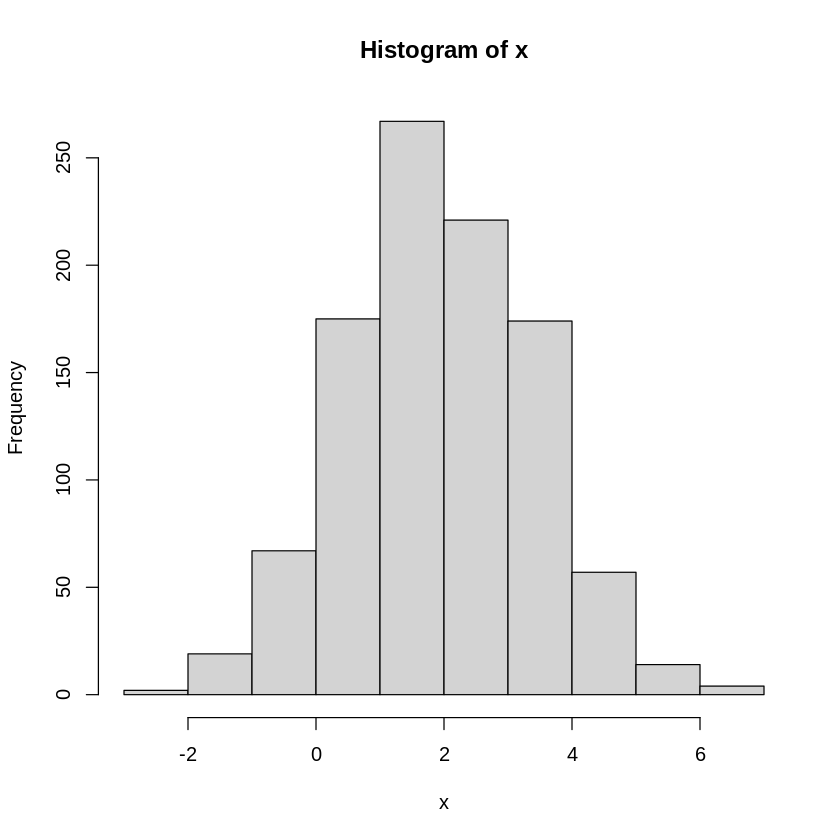

In [6]:
x = rnorm(mean=0, sd=1, n=1000) + rnorm(mean=2, sd=1, n=1000)
head(x)  # print first 5 values
hist(x)  # make a histogram

We'll see more examples of R below. The free [W3Schools interactive tutorial](https://www.w3schools.com/r/) is a great place to start if you want to learn more about R.

## 📂 Opening data

Let's start with geospatial data in a simple format. A [collaboration](https://gis.cancer.gov/research/adopt.html) between the [National Heart, Lung, and Blood Institute](https://www.nhlbi.nih.gov/) (NHLBI) & [National Cancer Institute](https://www.cancer.gov/) (NCI) developed a [Neighborhood Deprivation Index](https://doi.org/10.1016/j.dib.2022.108002) (NDI) that creates a composite metric of many sociodemographic covariates from the [U.S. Census Bureau](https://www.census.gov/) [American Community Survey](https://www.census.gov/programs-surveys/acs.html) (2013-2019) summarized at the census tract level. For more technical documentation, please reference [this link](https://www.gis.cancer.gov/research/NeighDeprvIndex_Codebook.pdf).


In [7]:
# download geospatial data example
download.file(
  'https://gis.cancer.gov/research/NeighDeprvIndex_USTracts.csv',
  destfile = 'ndi.csv'
)

# inspect the file in our working directory (you should see "ndi.csv")
list.files(getwd())

[1] "library"     "ndi.csv"     "rlib.tar.gz" "sample_data"

Now that we've downloaded and unzipped the file, we can import it into an object in R. The `read.csv()` function used here will handle most kinds of geospatial data files. There are R packages available to handle other kinds of geospatial data - check out [CRAN](https://cran.r-project.org/web/views/Spatial.html) for more info.

In [8]:
ndi = read.csv('ndi.csv')

# verify import, notice that this is currently just a regular dataset
head(ndi)

,TractID,StCoFIPS,StAbbr,NDI,NDIQuint,MedHHInc,PctRecvIDR,PctPubAsst,MedHomeVal,PctMgmtBusSciArt,PctFemHeadKids,PctOwnerOcc,PctNoPhone,PctNComPlmb,PctEducHSPlus,PctEducBchPlus,PctFamBelowPov,PctUnempl
,<dbl>,<int>,<chr>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1001020100,1001,AL,-0.3082017,2-BelowAvg deprivation,67826,26.92307,12.068960,152500,38.47900,6.498673,75.2,2.7,0,90.6,37.8,12.0,4.6
2,1001020200,1001,AL,0.7938726,4-AboveAvg deprivation,41287,10.85568,24.137930,96100,30.51643,14.942520,61.9,1.1,0,82.0,16.2,18.3,3.4
3,1001020300,1001,AL,0.6497080,4-AboveAvg deprivation,46806,12.27521,12.900700,98900,27.86774,9.695074,66.4,0.7,0,86.3,18.1,10.0,4.7
4,1001020400,1001,AL,0.1747214,3-Average deprivation,55895,17.83876,5.660377,140800,28.98864,3.659233,79.6,1.6,1,90.0,26.7,1.5,6.1
5,1001020500,1001,AL,-0.5933945,2-BelowAvg deprivation,68143,20.17160,8.798283,187900,48.84060,3.505007,52.8,2.1,0,94.1,40.5,8.4,2.3
6,1001020600,1001,AL,0.6883914,4-AboveAvg deprivation,44549,17.84073,16.003060,93300,25.21994,8.039816,77.2,0.0,0,81.6,20.4,7.0,6.1


### Making it spatial

How do we get the data to be "geospatial"? We'll need to add information about the geographic shapes of each of these rows (census tracts). Fortunately we can grab this information easily from the U.S. Census Bureau using the ***tigris*** package. We'll just look at one state to make things simple (Maryland).

In [17]:
# first, cache (store) temporary results so we do not overload the census bureau
# with many download requests if we need to run our code multiple times
options(tigris_use_cache = TRUE)

# next, get the data for Maryland (2019)
# set `cb` argument to `TRUE` for appreviated boundaries better for plotting
md_tracts = tracts(year = 2019, state = 'MD', cb = TRUE)

# inspect the top of the data frame, we use data.frame to show head()
# that we want to treat it as a data.frame (a tabular dataset)
head(data.frame(md_tracts))


,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<MULTIPOLYGON [°]>
1,24,031,700310,1400000US24031700310,24031700310,7003.10,CT,2120305,71616,MULTIPOLYGON (((-77.3024 39...
2,24,047,950000,1400000US24047950000,24047950000,9500,CT,2863226,4480587,MULTIPOLYGON (((-75.09954 3...
3,24,005,408601,1400000US24005408601,24005408601,4086.01,CT,2473658,0,MULTIPOLYGON (((-76.62637 3...
4,24,005,490703,1400000US24005490703,24005490703,4907.03,CT,1532803,0,MULTIPOLYGON (((-76.62423 3...
5,24,033,806602,1400000US24033806602,24033806602,8066.02,CT,1639718,0,MULTIPOLYGON (((-76.91937 3...
6,24,510,260202,1400000US24510260202,24510260202,2602.02,CT,1019290,1618,MULTIPOLYGON (((-76.56596 3...


Next, we will join the census tract data to the `ndi` dataset so we can see where things are. Notice the similarity between the 11-digit `'TractID'` in the `ndi` dataset and the 11-digit `'GEOID'` in the `md_tracts` dataset. Let us see if all the values in our `md_tracts` dataset are in the `ndi` dataset.

The only issue is that one of these variables is a `<chr>` and the other is a `<dbl>` (see the headers of the table above), so we will convert the version in the `md_tracts` data to be a character variable.

In [18]:

# convert type to match
ndi$TractID = as.character(ndi$TractID)

# check types
print(class(ndi$TractID))
print(class(md_tracts$GEOID))

# how many maryland tracts are in the id list
table(md_tracts$GEOID %in% ndi$TractID)  # looks good

[1] "character"
[1] "character"



TRUE 
1396 

Now, we can left-join the `ndi` dataset to the `md_tracts` dataset. Left-join means that all records on the left (first) side form the basis for the dataset and the records on the right side are matched if possible (and dropped if not).

In [19]:
# join dataset
md_ndi = left_join(
  md_tracts,
  ndi,
  by = join_by(GEOID == TractID)
)

# inspect difference in new dataset (27 vs 10 variables)
dim(md_tracts)
dim(md_ndi)

[1] 1396   10

[1] 1396   27

🎉 We are linked! 🎉

## 🔎 Inspecting data

Now that our linked `md_ndi` dataset is set up, let us see what is there. [The NHLBI/NCI NDI codebook](https://www.gis.cancer.gov/research/NeighDeprvIndex_Codebook.pdf) has detailed descriptions of these variables. Notice that we still have some additional variables that were present in the `md_tracts` dataset.

In [20]:
# inspect variable names
names(md_ndi)

[1] "STATEFP"          "COUNTYFP"         "TRACTCE"          "AFFGEOID"        
 [5] "GEOID"            "NAME"             "LSAD"             "ALAND"           
 [9] "AWATER"           "StCoFIPS"         "StAbbr"           "NDI"             
[13] "NDIQuint"         "MedHHInc"         "PctRecvIDR"       "PctPubAsst"      
[17] "MedHomeVal"       "PctMgmtBusSciArt" "PctFemHeadKids"   "PctOwnerOcc"     
[21] "PctNoPhone"       "PctNComPlmb"      "PctEducHSPlus"    "PctEducBchPlus"  
[25] "PctFamBelowPov"   "PctUnempl"        "geometry"

The dataset is too large to look at all at once, so we will just inspect the first few rows to get a sense of the data. Notice that the geospatial data for each census tract is stored in the final variable called `'geometry'` (the data type for this column is `<MULTIPOLYGON>`) but only the first coordinate value is displayed in this view.

In [21]:
options(repr.matrix.max.cols = 100)  # override the default, and show all cols
head(data.frame(md_ndi))

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,StCoFIPS,StAbbr,NDI,NDIQuint,MedHHInc,PctRecvIDR,PctPubAsst,MedHomeVal,PctMgmtBusSciArt,PctFemHeadKids,PctOwnerOcc,PctNoPhone,PctNComPlmb,PctEducHSPlus,PctEducBchPlus,PctFamBelowPov,PctUnempl,geometry
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<MULTIPOLYGON [°]>
1,24,031,700310,1400000US24031700310,24031700310,7003.10,CT,2120305,71616,24031,MD,-0.7975869,2-BelowAvg deprivation,75393,18.371910,8.401792,303100,51.10710,9.970126,59.5,1.4,0.0,87.3,43.9,10.3,6.0,MULTIPOLYGON (((-77.3024 39...
2,24,047,950000,1400000US24047950000,24047950000,9500,CT,2863226,4480587,24047,MD,NA,9-NDI not avail,51042,37.860570,10.336530,309100,31.62583,NA,66.1,1.1,2.8,90.6,32.0,6.6,10.9,MULTIPOLYGON (((-75.09954 3...
3,24,005,408601,1400000US24005408601,24005408601,4086.01,CT,2473658,0,24005,MD,-1.5365987,1-Least deprivation,102902,35.129740,2.528276,340300,55.95560,2.062541,95.3,0.0,0.0,96.4,57.3,0.6,1.2,MULTIPOLYGON (((-76.62637 3...
4,24,005,490703,1400000US24005490703,24005490703,4907.03,CT,1532803,0,24005,MD,-1.7499025,1-Least deprivation,92386,26.976420,5.755894,419800,59.90364,4.923717,49.1,6.7,0.0,98.9,69.2,4.8,4.5,MULTIPOLYGON (((-76.62423 3...
5,24,033,806602,1400000US24033806602,24033806602,8066.02,CT,1639718,0,24033,MD,0.4579043,4-AboveAvg deprivation,70806,9.410007,23.375650,254100,22.99829,10.978340,54.2,4.9,0.0,61.3,25.4,10.4,5.4,MULTIPOLYGON (((-76.91937 3...
6,24,510,260202,1400000US24510260202,24510260202,2602.02,CT,1019290,1618,24510,MD,1.0073064,5-Most deprivation,38347,5.134700,29.182700,101300,29.94978,13.949500,40.5,5.3,0.0,81.2,9.5,18.1,10.4,MULTIPOLYGON (((-76.56596 3...


### Geometry

What's actually "in" this mysterious `'geometry'` variable? Let us take a quick look at the first observation, using `$` to specify a variable and `[[1]]` to grab its first value.

In [22]:
md_ndi$geometry[[1]]

MULTIPOLYGON (((-77.3024 39.18834, -77.29835 39.18948, -77.29516 39.18829, -77.29254 39.18585, -77.29195 39.18392, -77.28772 39.18492, -77.28505 39.18674, -77.28357 39.18882, -77.28325 39.18853, -77.27634 39.18917, -77.27384 39.18794, -77.27383 39.18629, -77.27374 39.18438, -77.27377 39.18412, -77.27459 39.18249, -77.27629 39.18146, -77.27419 39.17942, -77.26875 39.17608, -77.26913 39.17548, -77.27148 39.17379, -77.27219 39.1741, -77.28198 39.17758, -77.29425 39.18186, -77.29668 39.18241, -77.29709 39.18428, -77.30152 39.18454, -77.30016 39.18597, -77.30151 39.18668, -77.3024 39.18834)))



It appears to be a sequence of coordinate values. Let us explore a bit further and see if we can plot them. We will use better tools to do this below, but it is nice to see that there is nothing "magic" going on here.

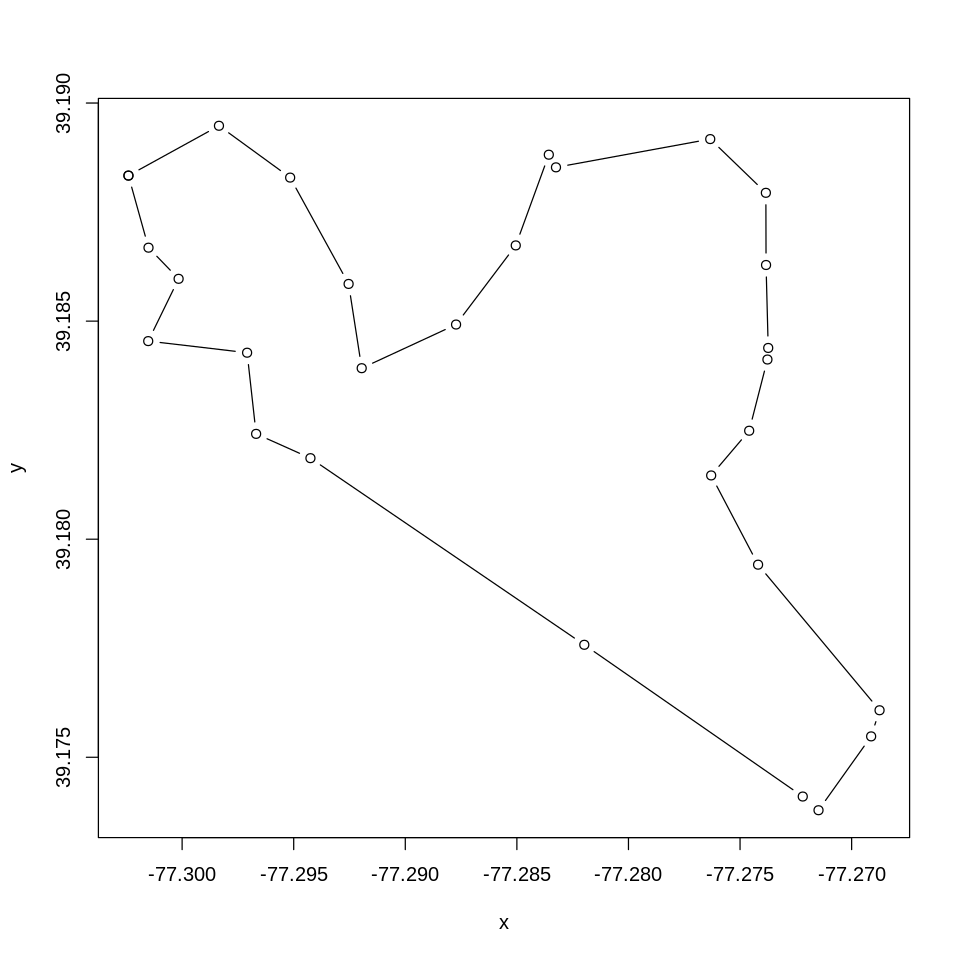

In [23]:
# extract one value
raw_data = unlist(md_ndi$geometry[[1]]) # force the object into a vector
n = length(raw_data)                    # find the length
x = raw_data[1:(n/2)]                   # the first half is the longitude (x)
y = raw_data[(n/2 + 1):n]               # the second half is the latitude (y)

# plot as lines connecting points
options(repr.plot.width = 8, repr.plot.height = 8)
plot(x,y, type = 'b')


### Distributions

The `md_ndi` object that we created acts like a normal **R** dataset. For instance, we can look at the histogram of any of these variables using the ***ggplot2*** package suite.

It is worth noting a few things about the syntax for `ggplot()` because we will be using it below to create some maps:

* The main `ggplot()` call specifies the data we want to plot.
* `geom_histogram()` specifies the graph style.
* `aes()` specifies the aesthetics of the graph: how variables in the dataset are used (i.e., the x-axis is set to the `'NDI'` value).
* `binwidth` sets the graph to show small increments (`size =  0.1`).
* `labs()` adds labels to elements of the graph.
* Notice that we have broken the code up into multiple lines by giving incomplete lines ending in `+` that **R** combines.
* Also notice we get a warning message about "non-finite values" being removed - this is **R** warning us that there are missing values not being plotted (this is okay for this example, but it is good that **R** tells us about it)

Warning message:
“Removed 93 rows containing non-finite outside the scale range (`stat_bin()`).”


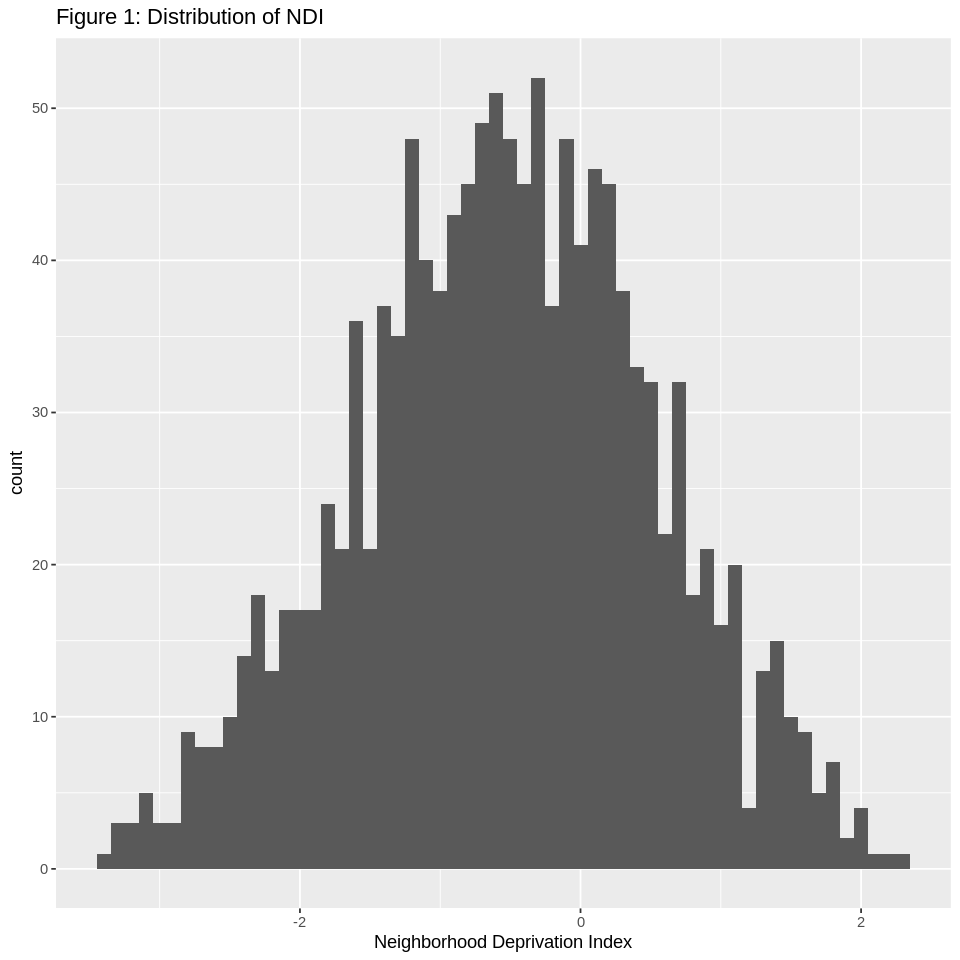

In [ ]:
ggplot(md_ndi) +
  geom_histogram(aes(x = NDI), binwidth = 0.1) +
  labs(
    title = 'Figure 1: Distribution of NDI',
    x = 'Neighborhood Deprivation Index'
  )

## 🌐 Mapping

To create a map, we just need to change the graph options:
* We first set options to increase the size of our plot window, to get a larger figure with more detail. If you right-click the figure and open it in a new tab you can see it at full size.
* The type of graph geometry is now `geom_sf()`, meaning spatial feature
* Instead of assigning the variable to the x-axis coordinate, we use it to determine the fill color.
* We set the line color for the plot to `NA` (i.e., missing) to prevent the census tract boundary lines from drawing on top of the fill colors, so we can see their contents better.
* There are no colors for areas without mail delivery or for which the variables could not be calculated due to low population (e.g., Western U.S. and Alaska) or a missing NDI component, and these default to grey (i.e., n=93 Maryland census tracts missing NDI values).

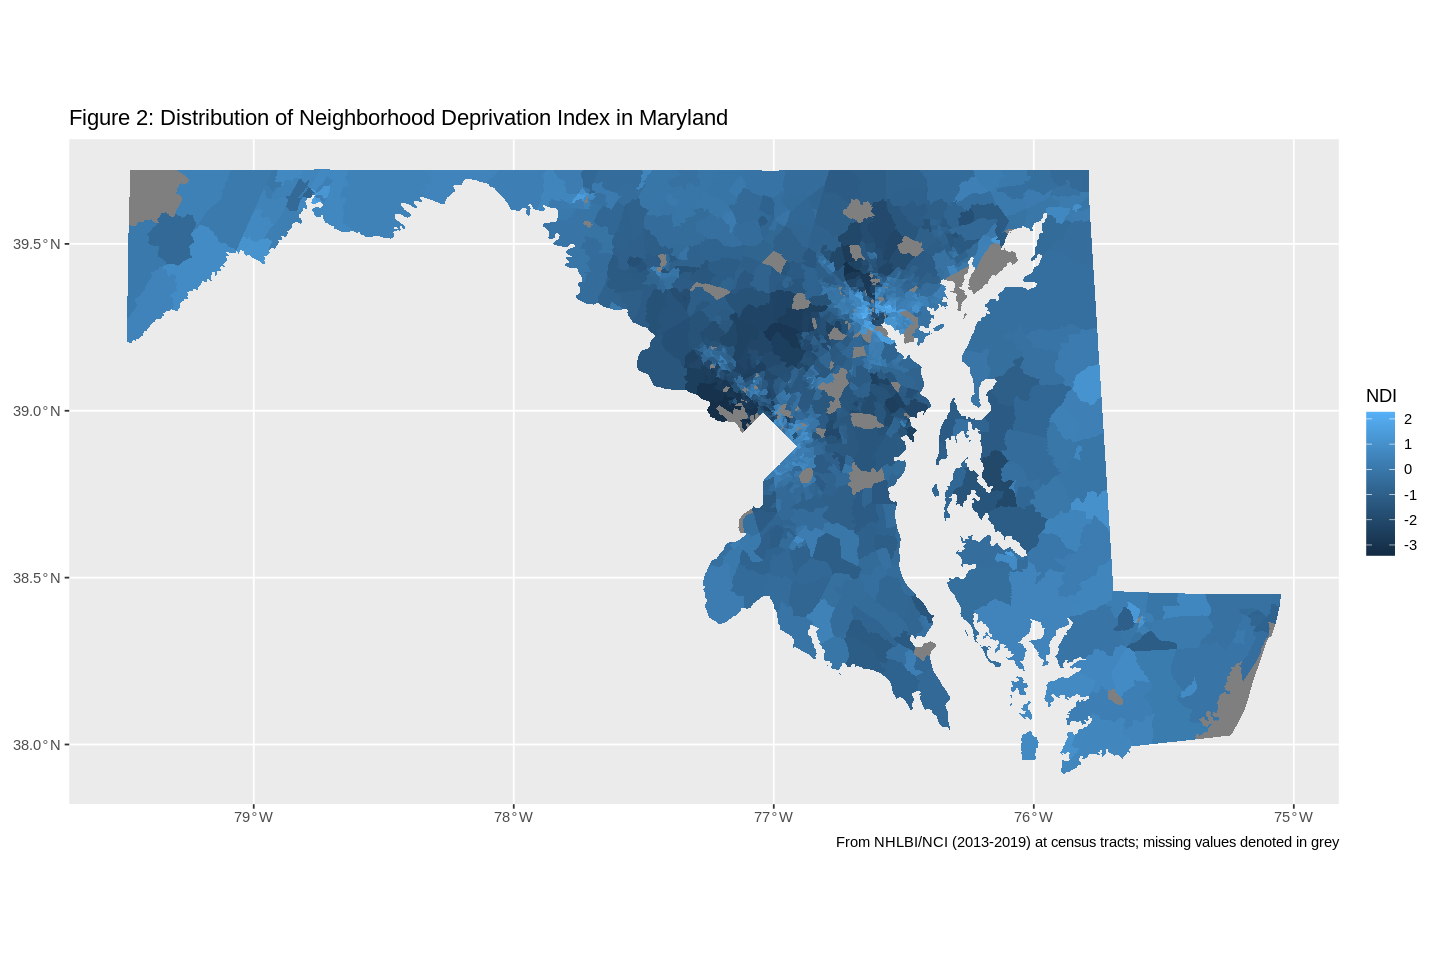

In [32]:
options(repr.plot.width = 12, repr.plot.height = 8)
ggplot(md_ndi) +
  geom_sf(aes(fill = NDI), color = NA) +
  labs(
    title='Figure 2: Distribution of Neighborhood Deprivation Index in Maryland',
    caption = 'From NHLBI/NCI (2013-2019) at census tracts; missing values denoted in grey'
  )

## ➕ Deriving variables

Maps can be useful for understanding your data, but how do we integrate these variables into analysis models?

Typically, you will start from residential addresses in your study that you geocode using a secure geocoder like [DeGAUSS](https://degauss.org/). The geocoding process takes a residential address and looks up the corresponding geographic coordinates (longitude = X and latitude = Y). There are privacy protection concerns at this step, so it is performed in a secure and protected computing environment.

You can see what a geocoder does by trying out the [Census Geocoder](https://geocoding.geo.census.gov/geocoder/locations/onelineaddress?form).

### Simulate a cohort

For this activity, we will pretend that you have already passed the study addresses through a geocoder and have longitude and latitude coordinates for each participant. We will simulate a basic cohort study dataset (N = 10,000; complete spatial random across state) to mimic what you might start with before doing the geographic linkage.

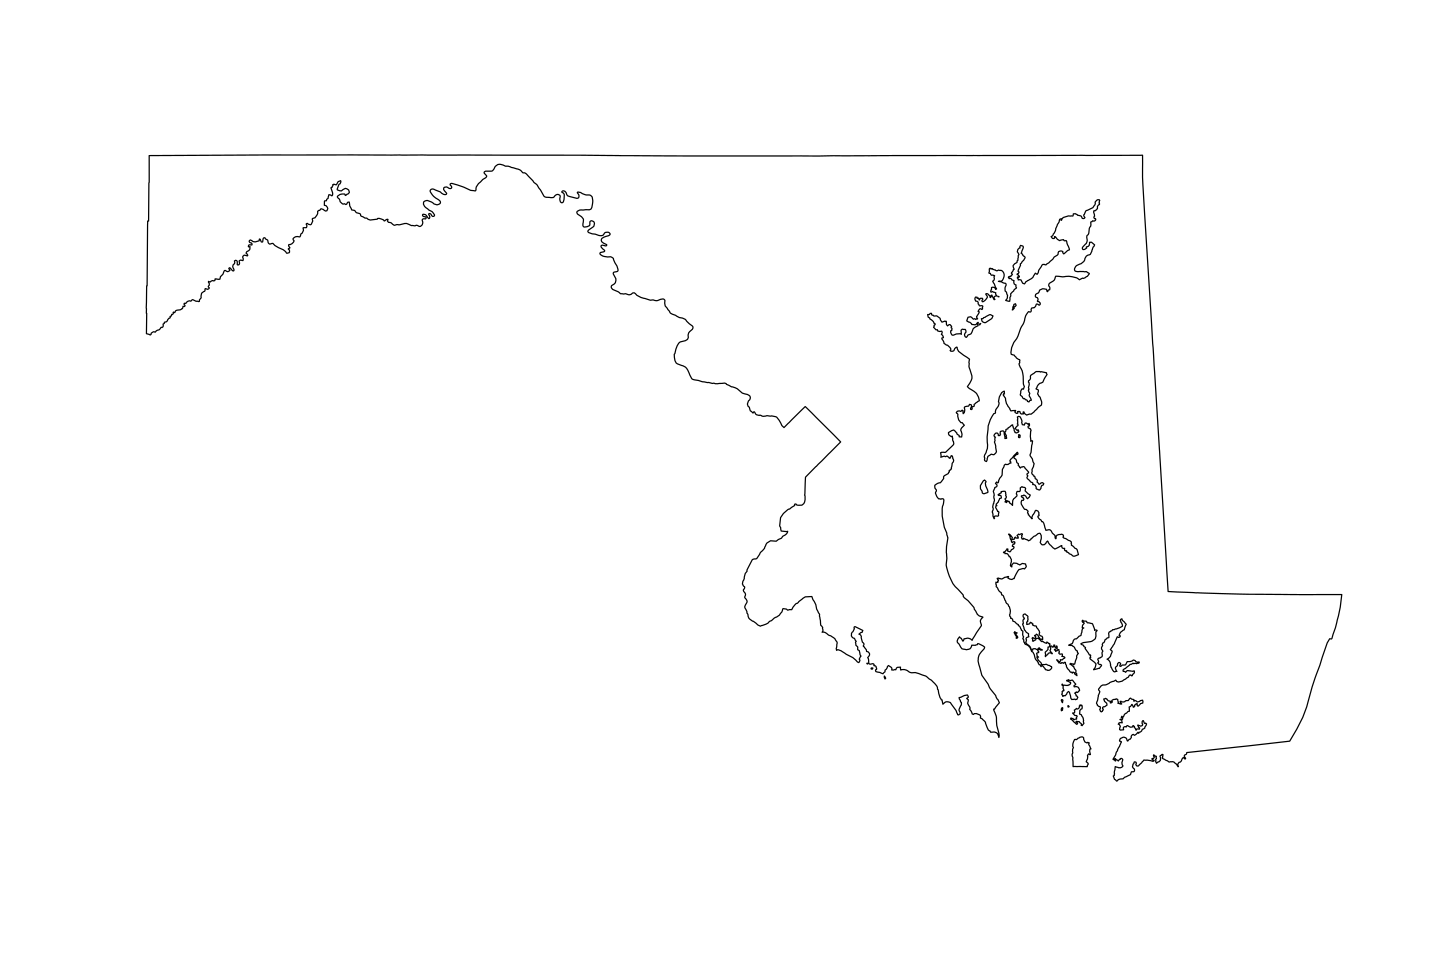

In [37]:
# simulate a study area
study_area = st_union(st_geometry(md_tracts))
plot(study_area)

Warning message in st_poly_sample(x, size = size, ..., type = type, by_polygon = by_polygon, :
“coordinate ranges not computed along great circles; install package lwgeom to get rid of this warning”


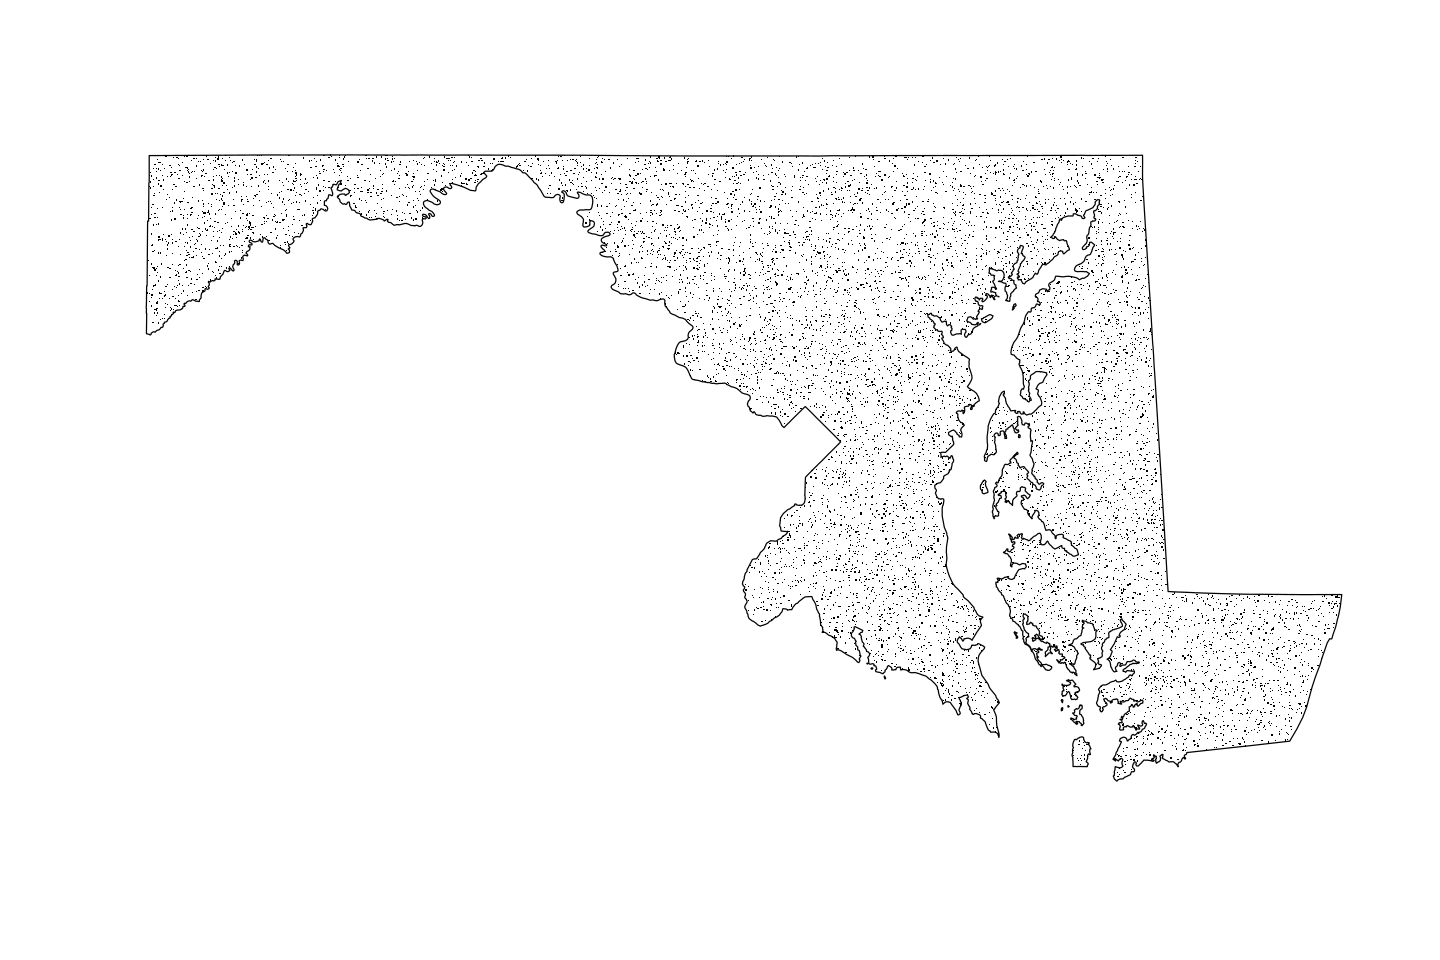

In [38]:
# simulate a study sample

set.seed(20250912) # standardize the random number generator for consistent runs

N = 10000
study_sample = st_sample(study_area, size = N)

study_data = st_sf(
  data.frame(id = 1:N),
  geometry = study_sample
)

# plot points on the same map
plot(study_area)
plot(study_sample, add = TRUE, pch = '.')

### Link data

Next, let us link the geospatial `md_ndi` dataset to our simulated cohort. Notice that we have an `'id'` number for each participant on the left, and the rest of the data corresponds to the information from the census tract within which that person is located.

In [40]:
linked = st_join(study_data, md_ndi)
head(data.frame(linked))

,id,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,StCoFIPS,StAbbr,NDI,NDIQuint,MedHHInc,PctRecvIDR,PctPubAsst,MedHomeVal,PctMgmtBusSciArt,PctFemHeadKids,PctOwnerOcc,PctNoPhone,PctNComPlmb,PctEducHSPlus,PctEducBchPlus,PctFamBelowPov,PctUnempl,geometry
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<POINT [°]>
1,1,24,041,960501,1400000US24041960501,24041960501,9605.01,CT,59026265,2624690,24041,MD,-0.3286456,2-BelowAvg deprivation,79853,25.28916,8.832800,264200,34.21350,8.412197,84.4,2.1,0.0,91.4,27.1,6.1,5.5,POINT (-75.99002 38.781)
2,2,24,047,950800,1400000US24047950800,24047950800,9508,CT,214071634,18392283,24047,MD,-0.3025011,2-BelowAvg deprivation,68347,21.77961,9.053285,302500,34.43809,6.001034,79.0,3.2,0.9,89.1,28.2,4.9,5.6,POINT (-75.24475 38.31879)
3,3,24,037,876100,1400000US24037876100,24037876100,8761,CT,93516859,37341313,24037,MD,-0.8596006,2-BelowAvg deprivation,100685,32.30309,9.272183,321100,46.64512,2.658690,81.0,3.7,1.7,91.5,33.1,3.7,3.6,POINT (-76.49403 38.18686)
4,4,24,023,000400,1400000US24023000400,24023000400,4,CT,264684192,2250594,24023,MD,0.7761746,4-AboveAvg deprivation,47794,14.81788,22.185430,116000,26.10350,2.980132,84.4,2.5,0.0,84.7,8.5,5.9,5.1,POINT (-79.26024 39.40181)
5,5,24,043,010700,1400000US24043010700,24043010700,107,CT,138283813,3414251,24043,MD,0.5086534,4-AboveAvg deprivation,49007,23.08812,15.149300,155400,23.27348,5.899490,72.0,1.5,0.0,86.0,13.3,9.0,4.7,POINT (-78.11214 39.68802)
6,6,24,043,010600,1400000US24043010600,24043010600,106,CT,188561684,4808825,24043,MD,0.2794355,4-AboveAvg deprivation,60104,16.76034,9.964230,215700,28.07361,5.569749,80.2,1.7,0.9,83.9,15.6,5.3,9.2,POINT (-77.91303 39.70863)


## 🧪 Study Impacts

### Simulate a trial
To see how this would affect a real study, let us give our cohort some additional study data and simulate a treatment and outcomes. This directed acyclic graph (DAG) shows a hypothetical study setup:

DAG.svg

For this demonstration, we will assume a simple causal model where our exposure in influenced by NDI and the outcome is influenced by NDI and the exposure.
* This is similar to how in an RCT, treatment assignment is randomized but actual treatment cannot be effectively randomized because we cannot directly control adherence (the intent-to-treat and as-treated effects differ).
* We will model treatment effect as having a fixed value, in reality, the treatment effect different for each person, and we are aiming to estimate various versions of the "mean" effect in different populations (i.e., among the cohort, the treated, standardized to a specific population, etc.).

Here is the simpler and more general form we will simulate:
DAG2.svg

In [41]:
# ## Set simulation parameters

set.seed(20250912) # standardize the random number generator for consistent runs

# We will start out with a bit of an "extreme" effect of the confound for illustration
# you can try changing the parameters in this section to see how it affects
# the bias of the crude model.
base_exposure_odds = 0.2      # base odds of exposure
base_outcome_odds = 0.2       # base odds of outcome
exposure_or = 2               # odds ratio: exposure -> outcome
ndi_exposure_or = 2           # odds ratio: ndi -> expoxure
ndi_or = 3                    # odds ratio: ndi -> outcome


# create simulated data
cohort = data.frame(
  id = 1:N,
  ndi = linked$NDI) %>%

  # drop observations without an NDI value
  filter(!is.na(ndi)) %>%

  # add other data
  mutate(

    # transform `'ndi'` into a binary variable for simplicity
    # `ndi = 1` means that the NDI is worse, 0 is better
    ndi = ndi > mean(ndi),

    # exposure assignment is based on `'ndi'`
    # (twice as likely for high NDI)
    exposure_odds = exp(
      log(base_exposure_odds) +
      log(ndi_exposure_or) * ndi),
    exposure_probability = exposure_odds / (1 + exposure_odds),
    exposure = rbinom(p = exposure_probability, size = 1, n = n()),

    # outcome is based on `'ndi'` and exposure
    outcome_odds = exp(
      log(base_outcome_odds) +
      log(exposure_or) * exposure +
      log(ndi_or) * ndi),
    outcome_probability = outcome_odds / (1 + outcome_odds),
    outcome = rbinom(p = outcome_probability, size = 1, n = n())

  )

# inspect the data structure
head(cohort, n = 15)

,id,ndi,exposure_odds,exposure_probability,exposure,outcome_odds,outcome_probability,outcome
,<int>,<lgl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>
1,1,TRUE,0.4,0.2857143,1,1.2,0.5454545,1
2,2,TRUE,0.4,0.2857143,0,0.6,0.3750000,0
3,3,FALSE,0.2,0.1666667,0,0.2,0.1666667,0
4,4,TRUE,0.4,0.2857143,1,1.2,0.5454545,0
5,5,TRUE,0.4,0.2857143,1,1.2,0.5454545,1
6,6,TRUE,0.4,0.2857143,1,1.2,0.5454545,0
7,7,FALSE,0.2,0.1666667,0,0.2,0.1666667,0
8,8,FALSE,0.2,0.1666667,0,0.2,0.1666667,0
9,9,FALSE,0.2,0.1666667,1,0.4,0.2857143,1


### 🪨 Crude model
Let us take a look at our data and some crude models with no adjustment for spatial information. Notice that the 95% confidence interval is not centered on the actual effect odds ratio.

In [42]:
crude_model = glm(
  outcome == 1 ~ exposure,
  data = cohort,
  family = binomial('logit')
)
summary(crude_model)

cat('\nTarget Odds Ratio:', exposure_or, '\n')
cat('\n\nOdds Ratios:\n')
exp(coef(crude_model))
exp(confint(crude_model))


Call:
glm(formula = outcome == 1 ~ exposure, family = binomial("logit"), 
    data = cohort)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.98701    0.02623  -37.63   <2e-16 ***
exposure     0.81724    0.05052   16.18   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 11831  on 9508  degrees of freedom
Residual deviance: 11574  on 9507  degrees of freedom
AIC: 11578

Number of Fisher Scoring iterations: 4



Target Odds Ratio: 2 


Odds Ratios:


(Intercept)    exposure 
  0.3726882   2.2642429

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),0.3539394,0.3922719
exposure,2.0507214,2.4998982


### 💎 Adjusted model
What happens if we adjust for our spatial covariate `'ndi'`? We can see that the estimate is closer to the true value set in the simulation.

In [44]:
adjusted_model = glm(
  outcome==1 ~ exposure + ndi,
  data = cohort,
  family = binomial('logit')
)
summary(adjusted_model)

cat('\nTarget Odds Ratio:',exposure_or,'\n')
cat('\n\nOdds Ratios:\n')
exp(coef(adjusted_model))
exp(confint(adjusted_model))


Call:
glm(formula = outcome == 1 ~ exposure + ndi, family = binomial("logit"), 
    data = cohort)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.60311    0.04131  -38.81   <2e-16 ***
exposure     0.70370    0.05207   13.52   <2e-16 ***
ndiTRUE      1.06156    0.04874   21.78   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 11831  on 9508  degrees of freedom
Residual deviance: 11068  on 9506  degrees of freedom
AIC: 11074

Number of Fisher Scoring iterations: 4



Target Odds Ratio: 2 


Odds Ratios:


(Intercept)    exposure     ndiTRUE 
  0.2012686   2.0212214   2.8908826

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),0.1854941,0.2181038
exposure,1.8250387,2.2383189
ndiTRUE,2.6283958,3.1818686


### 💕 Matching

An alternate approach to covariate adjusment is to match participants with similar geospatial values when making comparisons. This is particularly effective when you want to match on multiple geospatial variables, because if you can compare neighbors you know what all geospatial elements are by definition similar. This means that the approach also adjusts for for ***unmeasured*** geospatial covariates, an idea that is leveraged in many geostatistical methods.

GEOID,ids,n
<chr>,<chr>,<int>
24001000100,"17, 81, 178, 182, 189, 195, 262, 275, 285, 302, 368, 375, 426, 499, 638, 676, 888, 943, 1002, 1053, 1077, 1114, 1210, 1274, 1305, 1458, 1496, 1502, 1602, 1626, 1647, 1657, 1784, 1793, 1809, 1816, 1840, 1862, 1871, 1935, 1997, 2055, 2102, 2144, 2263, 2317, 2417, 2476, 2544, 2545, 2559, 2698, 2702, 2709, 2733, 2867, 2884, 2894, 2900, 2971, 3009, 3040, 3069, 3083, 3105, 3193, 3209, 3269, 3316, 3432, 3459, 3633, 3643, 3657, 3660, 3679, 3732, 3794, 3832, 3837, 3925, 3971, 3983, 4082, 4133, 4185, 4338, 4384, 4450, 4526, 4554, 4781, 4800, 4815, 4829, 4865, 4949, 4971, 4989, 4995, 5046, 5053, 5057, 5064, 5081, 5136, 5465, 5491, 5520, 5653, 5654, 5663, 5805, 5809, 5875, 5900, 5928, 6008, 6215, 6331, 6346, 6366, 6384, 6415, 6573, 6640, 6711, 6843, 6882, 7003, 7087, 7110, 7191, 7350, 7357, 7358, 7387, 7416, 7432, 7437, 7479, 7532, 7608, 7629, 7680, 7830, 7983, 7996, 8063, 8101, 8111, 8148, 8151, 8162, 8252, 8280, 8335, 8340, 8399, 8417, 8445, 8565, 8621, 8630, 8635, 8670, 8681, 8894, 8939, 8955, 8982, 9028, 9136, 9204, 9242, 9275, 9323, 9368, 9409, 9437, 9455, 9521, 9601, 9611, 9642, 9716, 9741, 9760, 9839, 9849, 9892, 9933",192
24001000200,"365, 613, 705, 786, 956, 1009, 1185, 1226, 1260, 1328, 1438, 1450, 1493, 1721, 1734, 2034, 2331, 2578, 2780, 3565, 3642, 3934, 4013, 4027, 4081, 4151, 4252, 4355, 4745, 4750, 4847, 5387, 5429, 5434, 5983, 5989, 6899, 7096, 7469, 7686, 8263, 8312, 8441, 8574, 8866, 9078, 9106, 9375, 9937",49
24001000300,"685, 3941, 5750, 7926, 8098, 8339, 9101, 9458",8
24001000500,"792, 4567, 7852",3
24001000700,8476,1
24001000800,"704, 1501",2
24001001000,6666,1
24001001200,"725, 1797, 2192",3
24001001300,5104,1


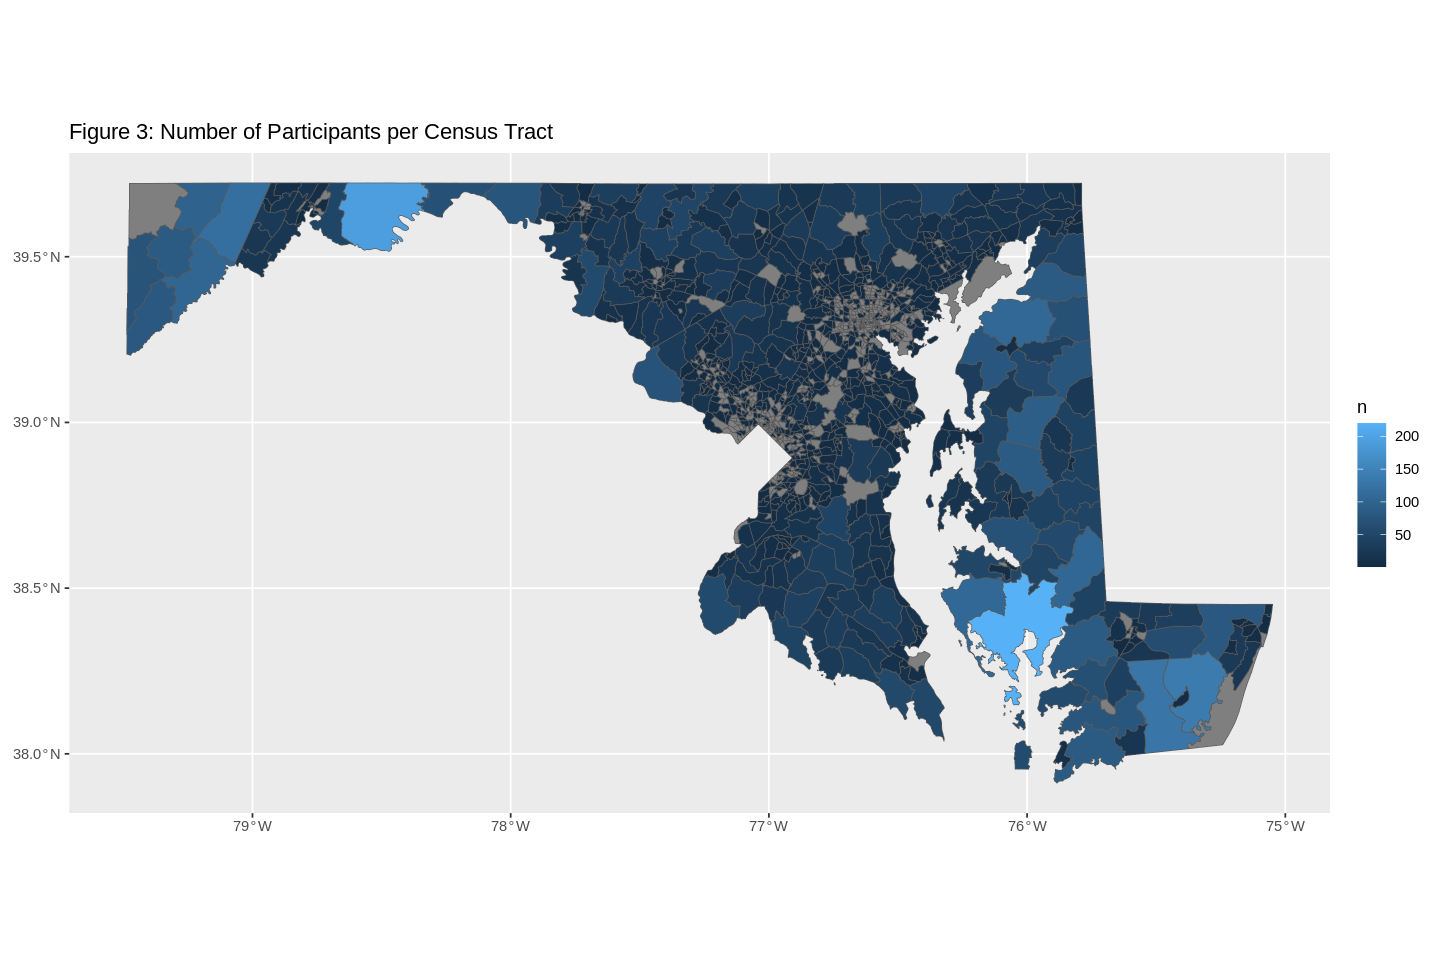

In [45]:
# link the geospatial information ("linked") to our study dataset by `'id'`
cohort_spatial = cohort %>%
  left_join(linked, by = 'id')

# see participant sets living in the same areas
groups = cohort_spatial %>%
  select(id, GEOID) %>%
  group_by(GEOID) %>%
  summarize(ids = paste(id, collapse = ', '), n = n())

head(groups, n = 15)

# look at the number of participants in each geographical area
# note that we link back to the polygon-based census tract file
groups_by_map = md_tracts %>%
  left_join(groups, by = 'GEOID')

# visualize with ***ggplot2***
options(repr.plot.width = 12, repr.plot.height = 8)
ggplot(groups_by_map) +
  geom_sf(aes(fill = n)) +
  labs(title = "Figure 3: Number of Participants per Census Tract")


NOTE: There are more simulated participants in larger census tracts because we assumed complete spatial randomness. In the future, can simulate a population based on population density or other geographic characteristics depending on the study design.

For this illustration we will show a generalization of matching: stratification. Instead of splitting the cohort into many 2-person groups, we will just use each geographic area as a group and run the comparison across groups ('strata').

In [46]:
cohort_with_strata = cohort %>%
  # join the geospatial identifiers
  left_join(linked %>% select(GEOID, id), by = 'id') %>%
  # join info about groups
  left_join(groups_by_map %>% select(GEOID, n), by = 'GEOID') %>%
  # filter to areas with at least 5 participants to simplify model fit
  filter(n >= 5)

# fit the stratified model using `glm`. Realistically, you would want to use
# a specialized fixed-effects estimation **R** package like ***lme4***
stratified_model = glm(outcome == 1 ~ exposure + factor(GEOID),
  data = cohort_with_strata,
  family = binomial('logit')
)

summary(stratified_model)

# This shows all of the effects of the individual census tracts.
# Notice that the estimate for "exposure" is still pretty accurate,
# even though we are not explicitly modeling `ndi` in the model but instead are
# stratifying by the geographic identifier
cat('\nTarget Odds Ratio:', exposure_or, '\n')
cat('\n\nOdds Ratios:\n')
exp(coef(stratified_model))



Call:
glm(formula = outcome == 1 ~ exposure + factor(GEOID), family = binomial("logit"), 
    data = cohort_with_strata)

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -4.527e-01  1.485e-01  -3.048 0.002302 ** 
exposure                  7.310e-01  5.685e-02  12.857  < 2e-16 ***
factor(GEOID)24001000200 -1.506e-01  3.296e-01  -0.457 0.647627    
factor(GEOID)24001000300  7.956e-01  7.525e-01   1.057 0.290420    
factor(GEOID)24001001401 -1.105e+00  6.675e-01  -1.656 0.097745 .  
factor(GEOID)24001001502  1.732e-01  5.434e-01   0.319 0.749923    
factor(GEOID)24001001503  3.592e-01  6.974e-01   0.515 0.606493    
factor(GEOID)24001001600 -3.464e-01  7.559e-01  -0.458 0.646766    
factor(GEOID)24001001700 -5.168e-01  5.360e-01  -0.964 0.334974    
factor(GEOID)24001001800 -1.339e+00  1.090e+00  -1.228 0.219377    
factor(GEOID)24001001900  1.263e-01  4.110e-01   0.307 0.758630    
factor(GEOID)24001002000  3.224e-01  4.481e-01 


Target Odds Ratio: 2 


Odds Ratios:


(Intercept)                 exposure factor(GEOID)24001000200 
            6.359182e-01             2.077078e+00             8.601706e-01 
factor(GEOID)24001000300 factor(GEOID)24001001401 factor(GEOID)24001001502 
            2.215701e+00             3.311037e-01             1.189126e+00 
factor(GEOID)24001001503 factor(GEOID)24001001600 factor(GEOID)24001001700 
            1.432210e+00             7.072165e-01             5.964180e-01 
factor(GEOID)24001001800 factor(GEOID)24001001900 factor(GEOID)24001002000 
            2.620882e-01             1.134616e+00             1.380369e+00 
factor(GEOID)24001002100 factor(GEOID)24001002200 factor(GEOID)24003701101 
            9.958294e-01             8.853244e-01             1.004724e-07 
factor(GEOID)24003701102 factor(GEOID)24003701200 factor(GEOID)24003701300 
            7.703069e-08             4.719857e-01             4.719857e-01 
factor(GEOID)24003701400 factor(GEOID)24003702100 factor(GEOID)24003702602 
            2.411445e-01             1.313861e+00             1.004724e-07 
factor(GEOID)24003702702 factor(GEOID)24003707001 factor(GEOID)24003707002 
            1.827925e-01             3.828269e-01             5.572215e+00 
factor(GEOID)24003708001 factor(GEOID)24003730100 factor(GEOID)24003730901 
            3.251963e-01             9.719547e-01             3.311037e-01 
factor(GEOID)24003730902 factor(GEOID)24003731102 factor(GEOID)24003731103 
            3.052640e-01             8.520941e-08             3.311037e-01 
factor(GEOID)24003731202 factor(GEOID)24003731303 factor(GEOID)24003731306 
            9.298556e-08             8.746665e-08             2.714623e-01 
factor(GEOID)24003740102 factor(GEOID)24003740303 factor(GEOID)24003740304 
            1.799121e-01             6.366559e-08             8.520941e-08 
factor(GEOID)24003740702 factor(GEOID)24003740800 factor(GEOID)24003751200 
            2.508148e-01             5.596916e-01             1.004724e-07 
factor(GEOID)24003751600 factor(GEOID)24003751700 factor(GEOID)24005402201 
            2.060623e+00             1.455119e-01             1.144270e-01 
factor(GEOID)24005402202 factor(GEOID)24005404600 factor(GEOID)24005404800 
            8.199376e-08             2.794770e-01             2.714623e-01 
factor(GEOID)24005404900 factor(GEOID)24005405000 factor(GEOID)24005406000 
            2.714623e-01             4.507078e-01             1.054104e-01 
factor(GEOID)24005407002 factor(GEOID)24005408100 factor(GEOID)24005408200 
            5.515563e-01             7.862646e-01             3.602671e-01 
factor(GEOID)24005408302 factor(GEOID)24005408502 factor(GEOID)24005410100 
            1.608447e-01             9.043056e-08             2.698043e-01 
factor(GEOID)24005410200 factor(GEOID)24005411101 factor(GEOID)24005411102 
            1.056065e-01             7.862646e-01             8.199376e-08 
factor(GEOID)24005411202 factor(GEOID)24005411302 factor(GEOID)24005411309 
            2.652450e-01             7.736055e-01             3.931323e-01 
factor(GEOID)24005430400 factor(GEOID)24005450100 factor(GEOID)24005450900 
            2.060623e+00             1.902274e+00             9.006742e-01 
factor(GEOID)24005451701 factor(GEOID)24005451802 factor(GEOID)24005451900 
            9.522597e-01             1.438950e+00             5.334612e-01 
factor(GEOID)24005490100 factor(GEOID)24009860101 factor(GEOID)24009860102 
            8.746665e-08             2.918192e-01             6.891244e-01 
factor(GEOID)24009860200 factor(GEOID)24009860300 factor(GEOID)24009860401 
            6.580119e-01             4.886366e-01             1.133465e-01 
factor(GEOID)24009860501 factor(GEOID)24009860502 factor(GEOID)24009860600 
            7.911757e-02             7.186916e-08             4.927288e-01 
factor(GEOID)24009860701 factor(GEOID)24009860702 factor(GEOID)24009860703 
            3.561272e-01             7.781876e-01             1.362826e+00 
factor(GEOID)24009860801 factor(GEOID)24009860802 factor(GEOI

# 📖 Further Reading

## 🌳 Geostatistics

Geostatistics assess variables across space. For example, do neighboring census tracts have similar NDI values? This can be used to assess model assumptions like the independence of observations (i.e., clustering).


### Moran's _I_

Moran's _I_ is an example of a summary statistic that assess the degree of spatial autocorrelation present in the data. We observe a statistically significant Moran's _I_ (p<0.001) for NDI in Maryland census tracts indicating the presence of geospatial clustering.

In [47]:
# install pacakge used in this section
install.packages('spdep')
library(spdep)

Installing package into ‘/content/library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘spData’, ‘deldir’, ‘sp’


Loading required package: spData

To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source')`



In [64]:
# create a "complete" dataset (fill in NDI values that are missing)
md_complete = md_ndi %>%
  mutate(NDI = ifelse(is.na(NDI), mean(NDI, na.rm = TRUE), NDI))

# calculate geospatial neighbors (assuming a Queen's case, any adjacency)
nb <- poly2nb(md_complete, queen = TRUE)
# calculate neighbor weights
lw <- nb2listw(nb, style = "W", zero.policy = TRUE)
# calculate Moran's I and test statistic
moran(md_complete$NDI, lw, length(nb), Szero(lw))
moran.test(md_complete$NDI, lw)

# TODO: Local Moran's I
#md_complete =
#  mutate(
#    Ii = localmoran(md_complete$NDI, lw) %>%
#      as.data.frame() %>%
#      select('Ii')
    # Ip = localmoran(md_complete$NDI, lw) %>%
    #  as.data.frame() %>%
    #  select('Pr(z != E(Ii)))
#  )


$I
[1] 0.6801395

$K
[1] 2.882801


	Moran I test under randomisation

data:  md_complete$NDI  
weights: lw    

Moran I statistic standard deviate = 42.724, p-value < 2.2e-16
alternative hypothesis: greater
sample estimates:
Moran I statistic       Expectation          Variance 
     0.6801395131     -0.0007168459      0.0002539595 


### G and Gstar

These statistics are local - you can plot them on a map. They show clustering "hot" and "cold" spots.

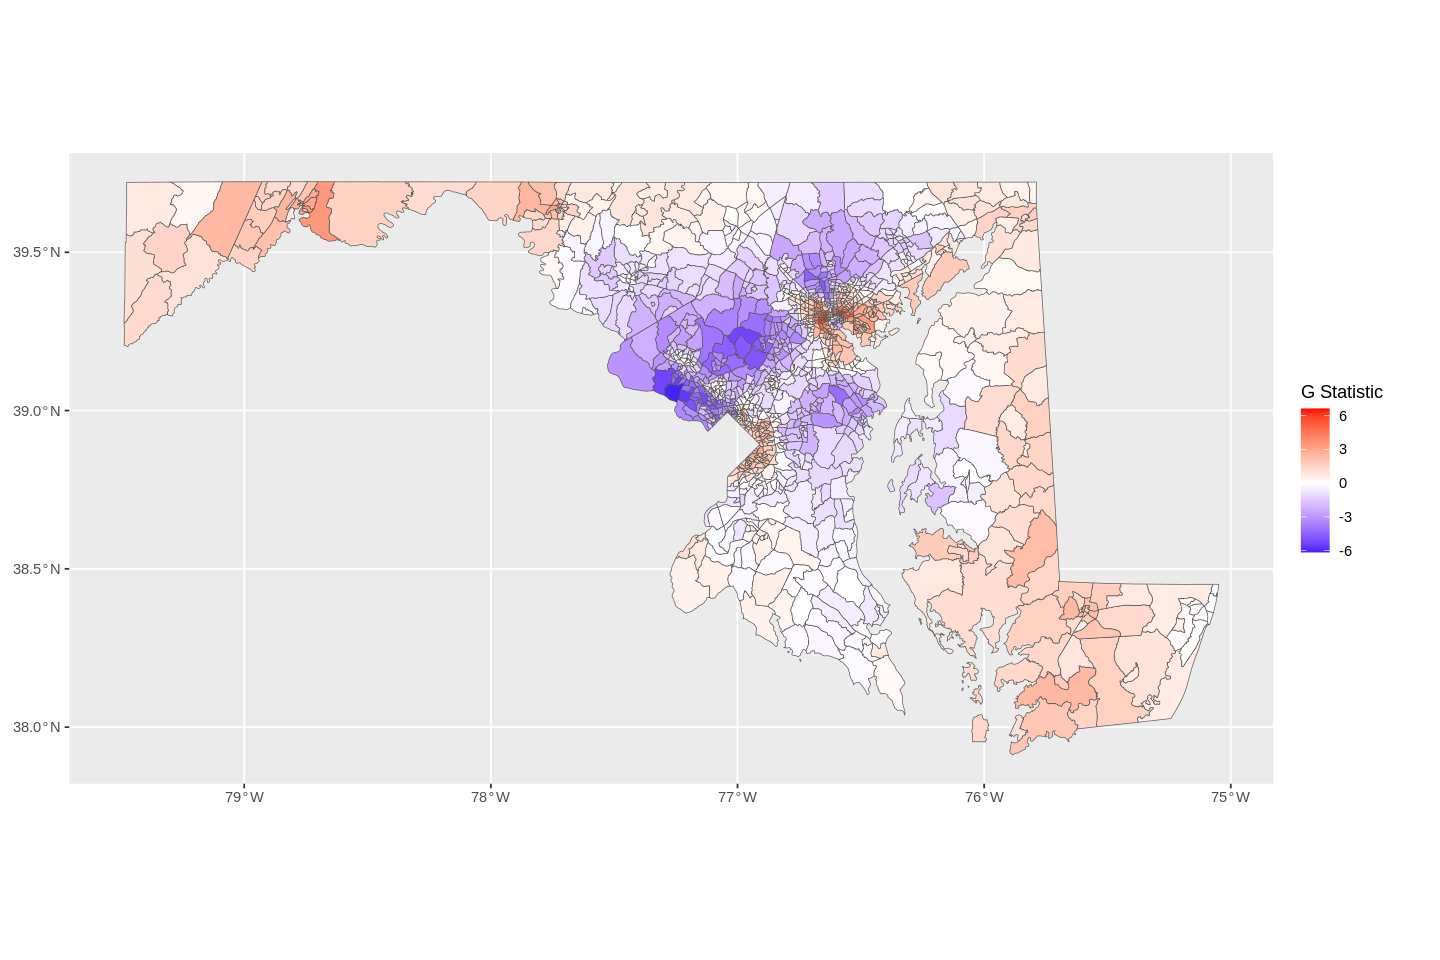

In [ ]:
md_complete$G = localG(md_complete$NDI, listw=lw)
ggplot(md_complete) +
  geom_sf(aes(fill=as.numeric(G))) +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0) +
  labs(fill='G Statistic')

## 🟦 Raster Data

So far, we've looked at spatial data stored as point and polygons. Rasters are another format of geospatial data consisting of a complete grid of observations. They are commonly used for data derived from satellite imagery.

## 🐺 Running on NIH HPC (Biowulf)

Since this is a Jupyter notebook, you can run this code on the NIH HPC using [the instructions here](https://hpc.nih.gov/apps/jupyter.html).

The basic procedure is:

1. Sign up for a Biowulf account.
2. From the login node, run an interactive job (e.g. sinteractive --tunnel).
3. Copy the resulting tunnel and connect to the assigned node.
4. Start Jupyter Lab and navigate to the resulting notebook URL.

## 🔧 Installing from CRAN

If the setup code at the top of the script isn't working, try installing the packages using the code block below. This takes ~20 minutes on Colab. Make sure you do this on a clean R runtime (in the top-right menu, delete and disconnect from the current runtime and then click restart runtime).

In [ ]:
# create a directory to store our R libraries
system("mkdir library")
.libPaths("library")

# download packages
install.packages('classInt')
install.packages('units')
install.packages("sf")
install.packages("ggplot2")
install.packages("dplyr")
install.packages('tigris')

# test packages
library(sf)
library(ggplot2)
library(dplyr)
library(tigris)

## 📦 Repackage
Use the code in this section to repackage the R libraries to rebuild the workshop in the future. You'll need to host this file somewhere where it can be easily downloaded (like Google Drive).


In [ ]:
# compress files
system('tar -czvf rlib.tar.gz library')
# then download from the file browser and upload somewhere that allows direct download links

# ❗ Help!

If you get stuck, try these steps:

* Try reloading the page, sometimes it will time out (google will return your loaned virtual machine to the pool if it isn't being used).
* Make sure you run the code in order, for example you need to run the first code block that installs and loads the R packages to get anything else to run.
* If you edited the code and can't get it to run anymore, just start over in a fresh copy of the tutorial.

##